## Thyroid Disease 

The most common thyroid disorder is hypothyroidism. Hypo- means deficient or under(active), so hypothyroidism is a condition in which the thyroid gland is underperforming or producing too little thyroid hormone.. Recognizing the symptoms of hypothyroidism is extremely important.





<img src="https://i.imgur.com/5cW3lGZ.gif?noredirect" width="800px">


### Data Set Information:



#### From Garavan Institute
#### Documentation: as given by Ross Quinlan
#### 6 databases from the Garavan Institute in Sydney, Australia
#### Approximately the following for each database:

* 2800 training (data) instances and 972 test instances
* Plenty of missing data
* 29 or so attributes, either Boolean or continuously-valued

#### 2 additional databases, also from Ross Quinlan, are also here

* Hypothyroid.data and sick-euthyroid.data
* Quinlan believes that these databases have been corrupted
* Their format is highly similar to the other databases

#### 1 more database of 9172 instances that cover 20 classes, and a related domain theory
#### Another thyroid database from Stefan Aeberhard

* 3 classes, 215 instances, 5 attributes
* No missing values

#### Dataset link:


##### [Here](https://www.kaggle.com/yasserhessein/thyroid-disease-data-set)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)

In [2]:
df = pd.read_csv('hypothyroid.csv')
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [3]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [4]:
df.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [7]:
df["binaryClass"].value_counts()

binaryClass
P    3481
N     291
Name: count, dtype: int64

In [8]:
df["binaryClass"]=df["binaryClass"].map({"P":1,"N":0})

In [9]:
df["pregnant"].value_counts()

pregnant
f    3719
t      53
Name: count, dtype: int64

In [10]:
df=df.replace({"t":1,"f":0})

In [11]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,?,SVHC,1
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,?,0,?,0,?,other,1
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,?,other,1
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,?,0,?,0,?,other,1
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,?,SVI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,?,0,?,0,?,0,?,other,1
3768,68,F,0,0,0,0,0,0,0,0,...,1,124,1,1.08,1,114,0,?,SVI,1
3769,74,F,0,0,0,0,0,0,0,0,...,1,112,1,1.07,1,105,0,?,other,1
3770,72,M,0,0,0,0,0,0,0,0,...,1,82,1,0.94,1,87,0,?,SVI,1


In [12]:
#df['target'].isnull().sum()

In [13]:
df['sex'].isnull().sum()

0

In [14]:
df["TBG"].value_counts()

TBG
?    3772
Name: count, dtype: int64

In [15]:
del df["TBG"]

In [16]:
df=df.replace({"?":np.NAN})

In [17]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

In [18]:
df["sex"].value_counts()

sex
F    2480
M    1142
Name: count, dtype: int64

In [19]:
df=df.replace({"F":0,"M":1})

In [20]:
df["referral source"].value_counts()

referral source
other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: count, dtype: int64

In [21]:
del df["referral source"]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [23]:
df["T3 measured"].value_counts()

T3 measured
1    3003
0     769
Name: count, dtype: int64

In [24]:
df["TT4 measured"].value_counts()

TT4 measured
1    3541
0     231
Name: count, dtype: int64

In [25]:
df["FTI measured"].value_counts()

FTI measured
1    3387
0     385
Name: count, dtype: int64

In [26]:
df["TBG measured"].value_counts()

TBG measured
0    3772
Name: count, dtype: int64

In [27]:
df["binaryClass"].value_counts()

binaryClass
1    3481
0     291
Name: count, dtype: int64

In [28]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
b

In [29]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [30]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [31]:
df['T4U']

0       1.14
1        NaN
2       0.91
3        NaN
4       0.87
        ... 
3767     NaN
3768    1.08
3769    1.07
3770    0.94
3771    1.07
Name: T4U, Length: 3772, dtype: float64

In [32]:
df['T4U'].fillna(df['T4U'].mean(), inplace=True)

In [33]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)


In [34]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [36]:
df['TSH'] = imputer.fit_transform(df[['TSH']])

In [37]:
df['T3'] = imputer.fit_transform(df[['T3']])

In [38]:
df['TT4'] = imputer.fit_transform(df[['TT4']])

In [39]:
# df['T4U'] = imputer.fit_transform(df[['T4U']])

In [40]:
df['FTI'] = imputer.fit_transform(df[['FTI']])

In [41]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [42]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'binaryClass'],
      dtype='object')

In [43]:
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

C:\Users\deepp\AppData\Local\Temp\ipykernel_14964\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

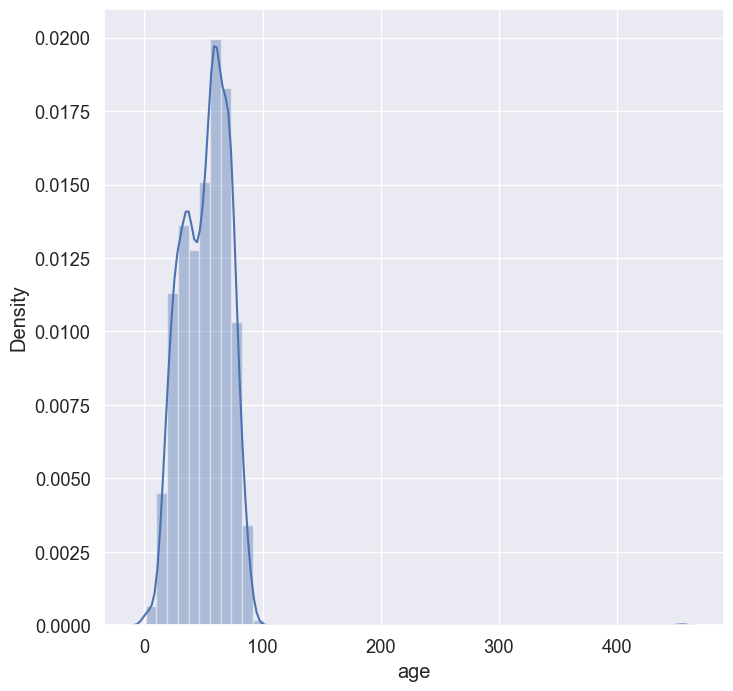

In [44]:
sns.distplot(df['age'])

C:\Users\deepp\AppData\Local\Temp\ipykernel_14964\2062954179.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sex'])


<Axes: xlabel='sex', ylabel='Density'>

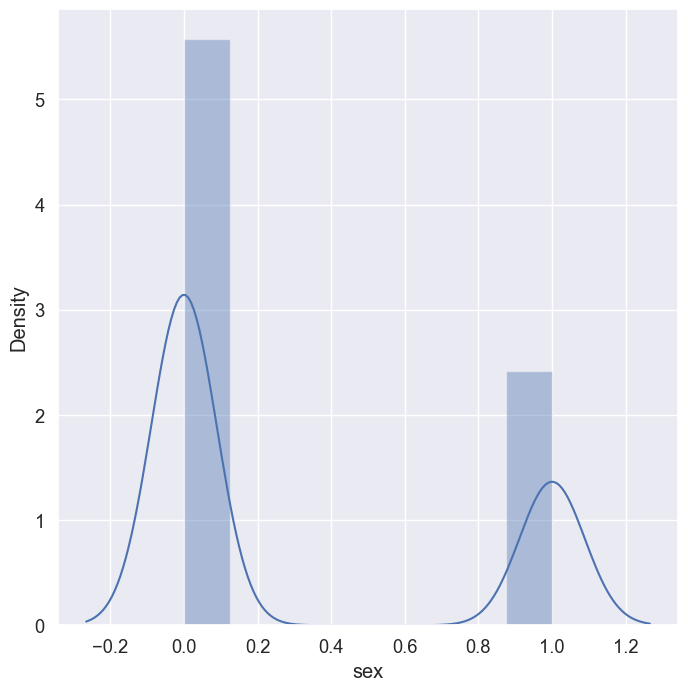

In [45]:
sns.distplot(df['sex'])

C:\Users\deepp\AppData\Local\Temp\ipykernel_14964\1645621658.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['T3'])


<Axes: xlabel='T3', ylabel='Density'>

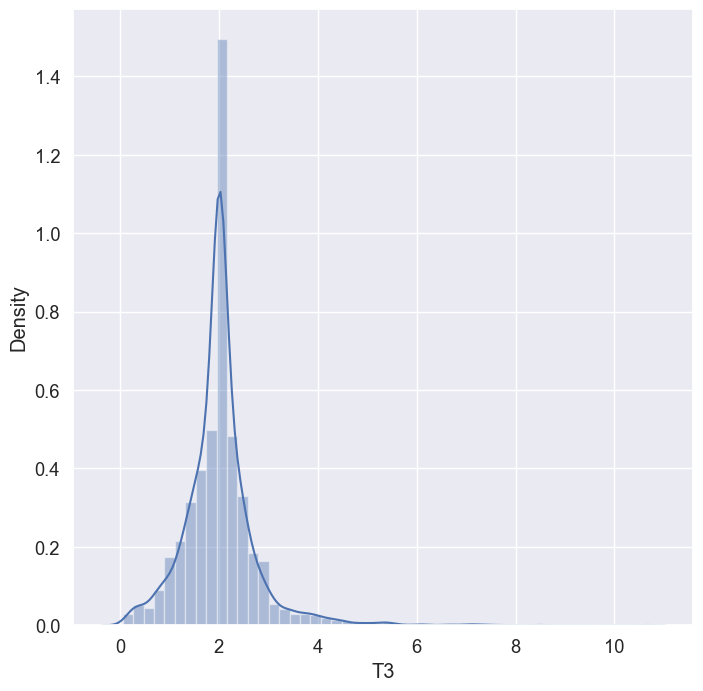

In [46]:
sns.distplot(df['T3'])

C:\Users\deepp\AppData\Local\Temp\ipykernel_14964\1057481052.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TT4'])


<Axes: xlabel='TT4', ylabel='Density'>

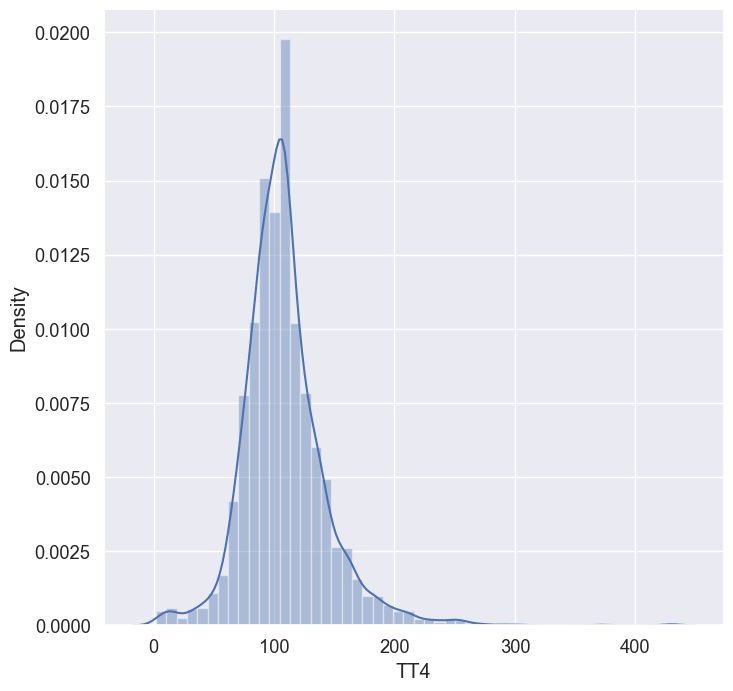

In [47]:
sns.distplot(df['TT4'])

C:\Users\deepp\AppData\Local\Temp\ipykernel_14964\1667572999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['T4U'])


<Axes: xlabel='T4U', ylabel='Density'>

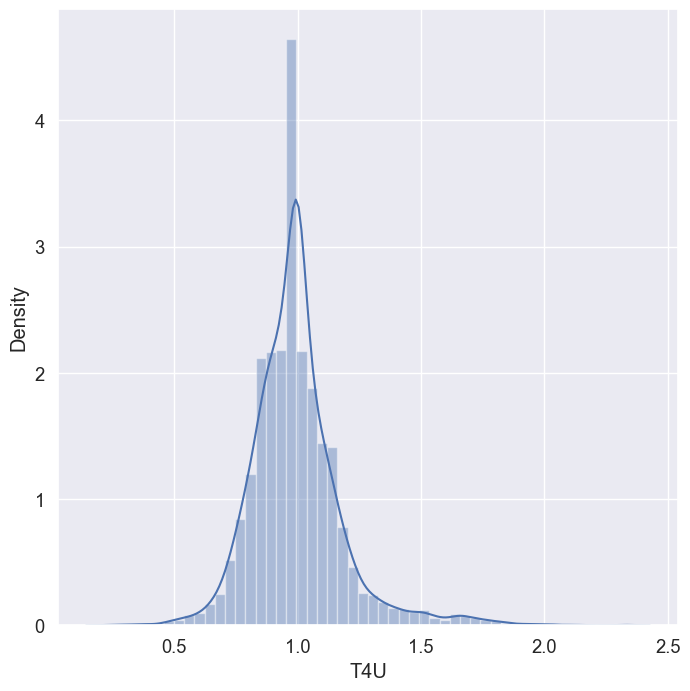

In [48]:
sns.distplot(df['T4U'])

C:\Users\deepp\AppData\Local\Temp\ipykernel_14964\3948446058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['FTI'])


<Axes: xlabel='FTI', ylabel='Density'>

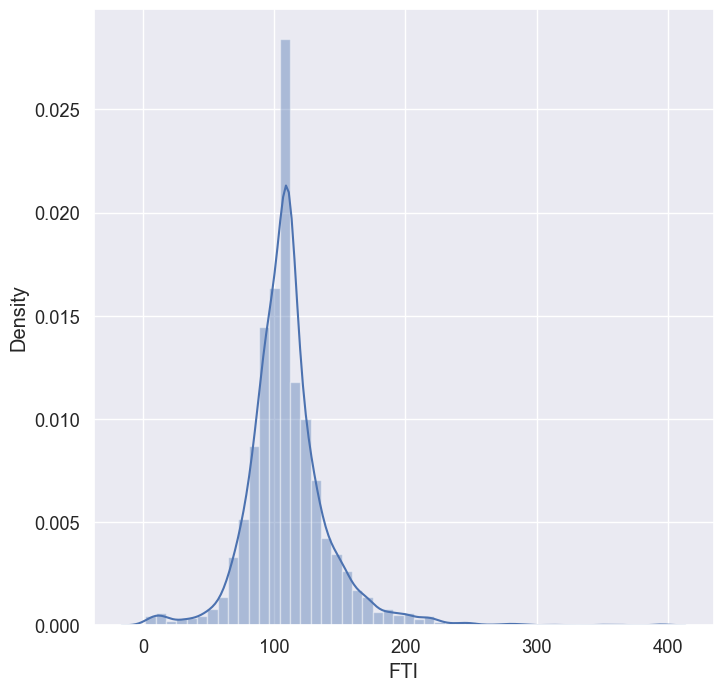

In [49]:
sns.distplot(df['FTI'])

C:\Users\deepp\AppData\Local\Temp\ipykernel_14964\3809824431.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TBG measured'])
d:\Codebook\Machine_Learning\env\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='TBG measured', ylabel='Density'>

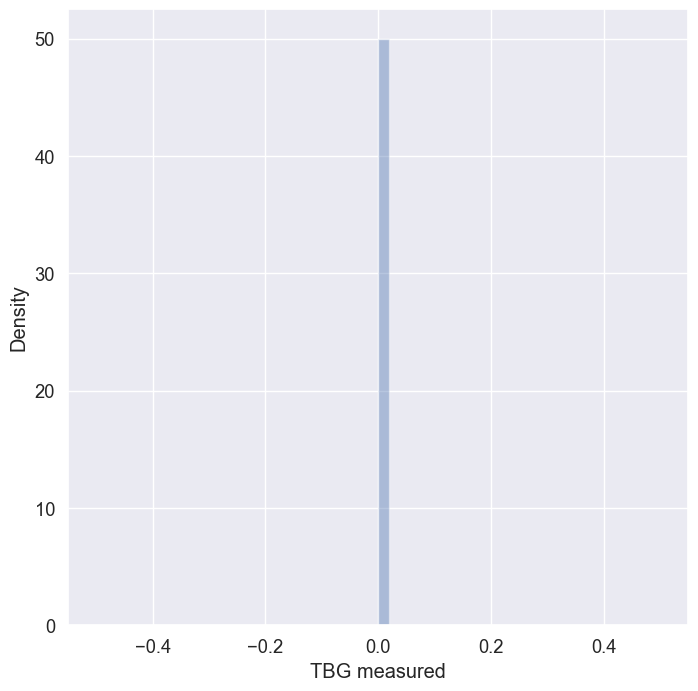

In [50]:
sns.distplot(df['TBG measured'])

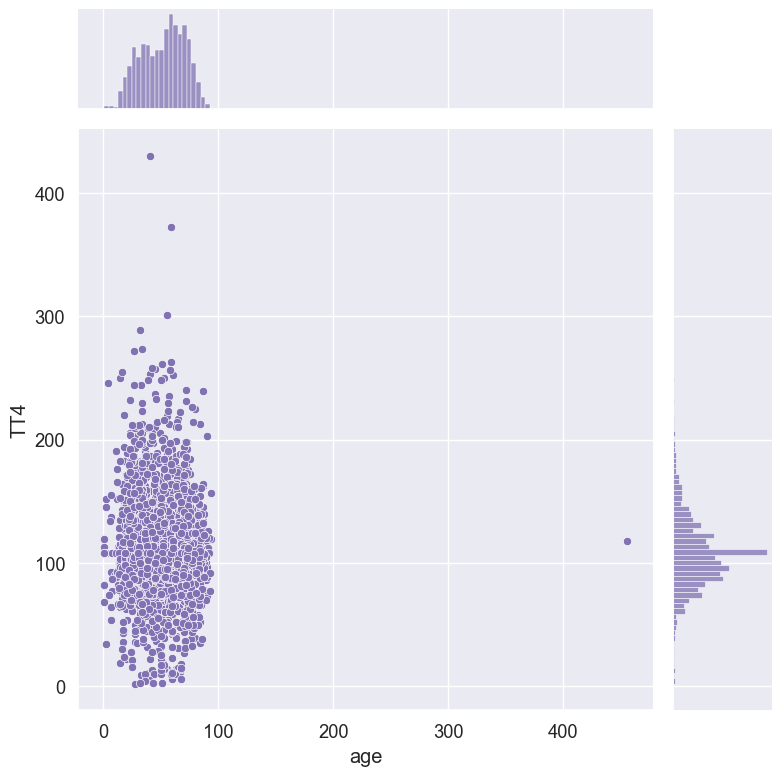

In [51]:
sns.jointplot(x='age', y='TT4', data=df, kind='scatter', height=8, color='m')

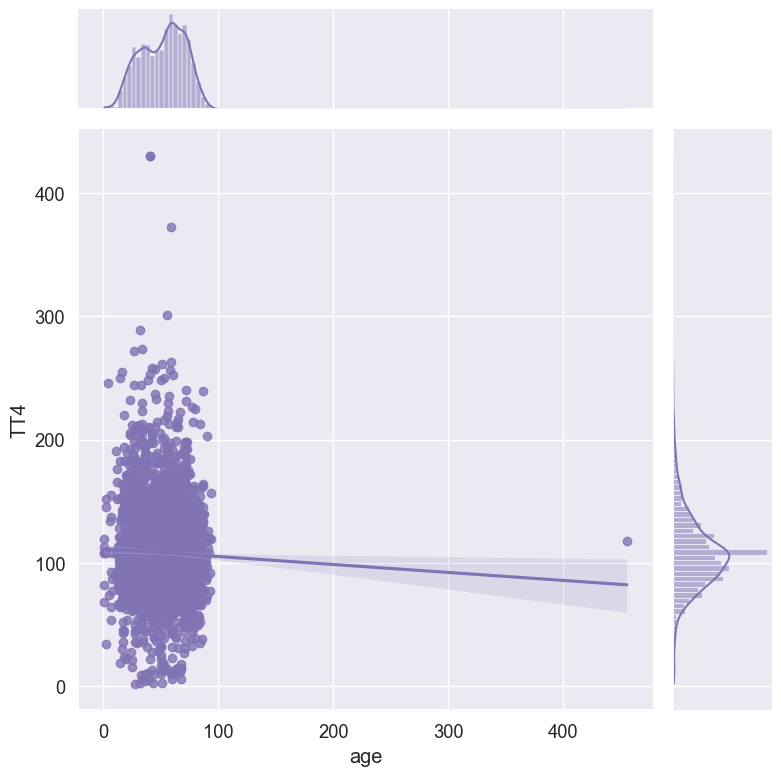

In [52]:
sns.jointplot(x='age', y='TT4', data=df, kind='reg', height=8, color='m')

C:\Users\deepp\AppData\Local\Temp\ipykernel_14964\2503486164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], kde=False, bins=30, color='m')


<Axes: xlabel='age'>

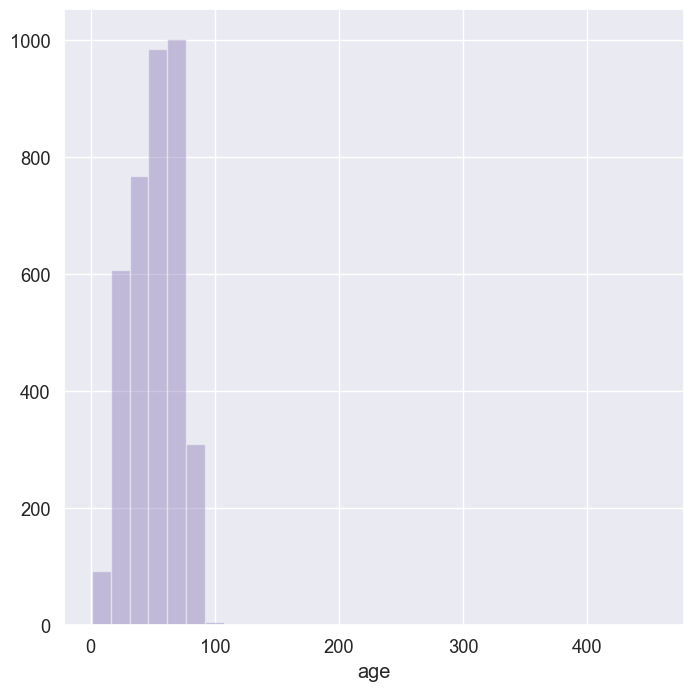

In [53]:
sns.distplot(df['age'], kde=False, bins=30, color='m')

<Axes: xlabel='binaryClass', ylabel='count'>

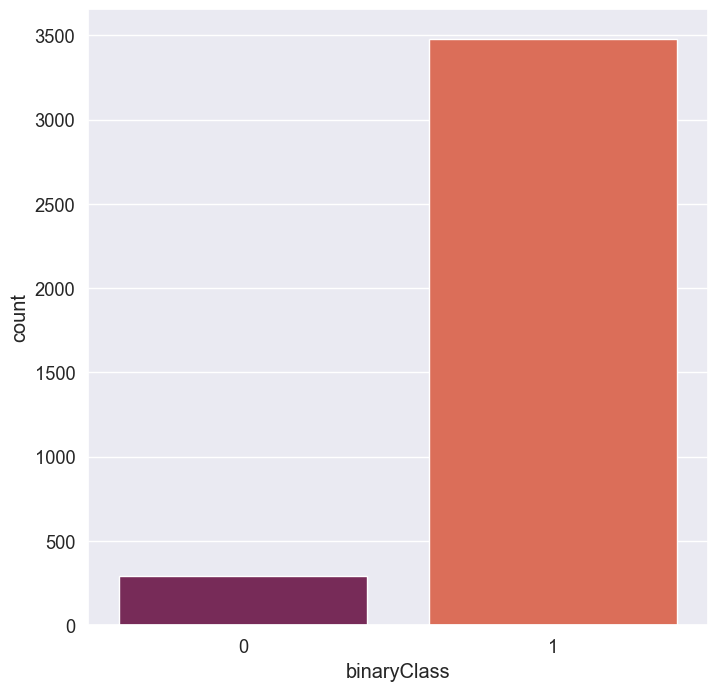

In [54]:
sns.countplot(x='binaryClass', data=df, palette='rocket')

<Axes: xlabel='binaryClass', ylabel='count'>

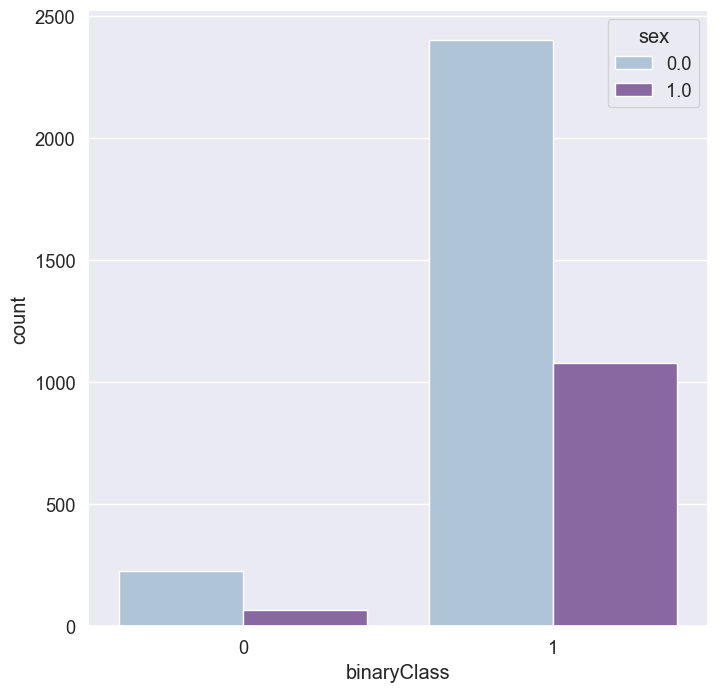

In [55]:
sns.countplot(x='binaryClass', data=df, hue='sex', palette='BuPu')

C:\Users\deepp\AppData\Local\Temp\ipykernel_14964\1221698579.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="binaryClass", y="age", data=df, palette="viridis")


<Axes: xlabel='binaryClass', ylabel='age'>

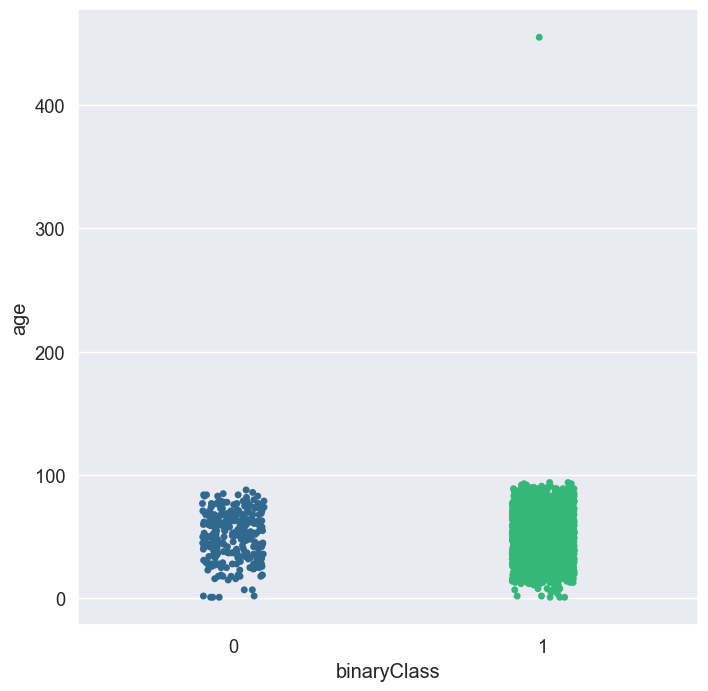

In [56]:
sns.stripplot(x="binaryClass", y="age", data=df, palette="viridis")

<Axes: xlabel='binaryClass', ylabel='age'>

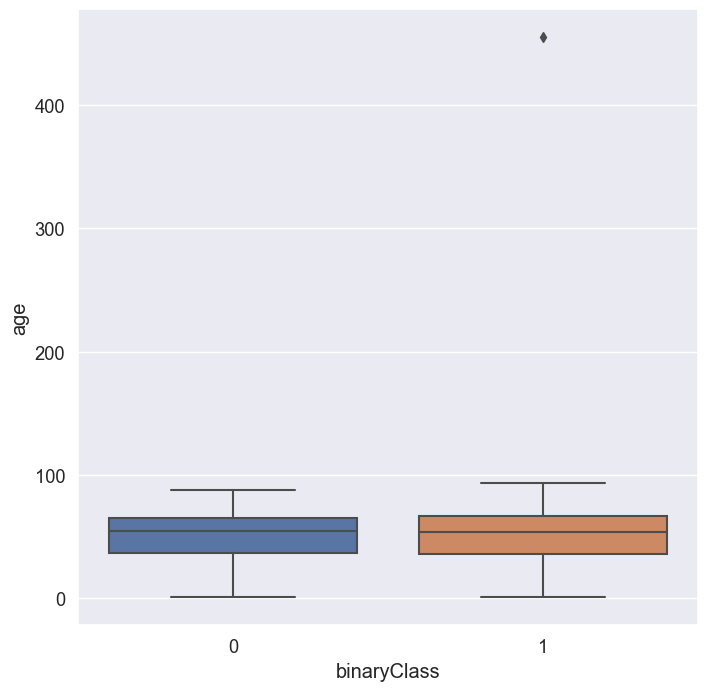

In [57]:
sns.boxplot(x='binaryClass', y='age', data=df)

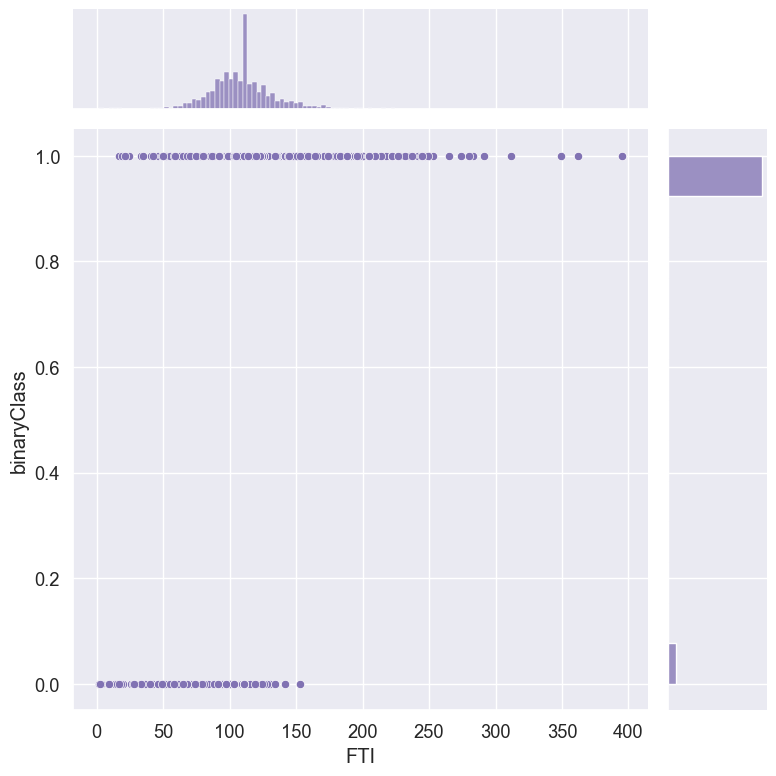

In [58]:
sns.jointplot(x='FTI', y='binaryClass', data=df, kind='scatter', height=8, color='m')

In [59]:
df_corr = df.corr()
df_corr

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
age,1.000000,-0.000154,0.014563,-0.017870,-0.063881,0.079468,-0.113521,-0.029502,0.052704,0.039562,...,7.311084e-02,-2.149247e-01,6.750898e-02,-3.760948e-02,8.536127e-02,-1.575229e-01,8.453378e-02,5.001749e-02,NaN,0.003174
sex,-0.000154,1.000000,-0.095709,0.044712,-0.027278,0.007438,-0.078665,-0.034543,-0.022612,-0.042687,...,7.135524e-02,-6.421320e-02,7.685721e-02,-1.675458e-01,5.166161e-02,-2.218835e-01,5.253222e-02,-4.189999e-02,NaN,0.049960
on thyroxine,0.014563,-0.095709,1.000000,0.005995,-0.002201,-0.042053,0.010152,0.037583,0.063373,0.094412,...,-1.450614e-01,6.484854e-03,2.496392e-02,2.128008e-01,3.885187e-02,4.636815e-02,3.828521e-02,1.857484e-01,NaN,0.081060
query on thyroxine,-0.017870,0.044712,0.005995,1.000000,-0.012446,0.012594,0.045247,0.005858,-0.014610,-0.029808,...,-3.340948e-02,-6.465900e-03,2.960328e-02,-4.702231e-03,3.155031e-02,4.384229e-04,3.141982e-02,-3.550040e-03,NaN,0.007448
on antithyroid medication,-0.063881,-0.027278,-0.002201,-0.012446,1.000000,-0.021624,0.072050,-0.012819,0.006589,-0.017264,...,1.094961e-02,7.921225e-02,-2.464939e-02,2.381055e-02,-2.953201e-02,6.036462e-02,-2.978795e-02,-1.660334e-02,NaN,0.021689
sick,0.079468,0.007438,-0.042053,0.012594,-0.021624,1.000000,-0.024040,-0.000762,-0.025384,0.027718,...,6.695144e-03,-7.647155e-02,-5.699708e-03,-3.700575e-02,9.399140e-03,-3.906941e-02,9.068046e-03,-2.118940e-02,NaN,0.001749
pregnant,-0.113521,-0.078665,0.010152,0.045247,0.072050,-0.024040,1.000000,-0.014251,-0.015048,-0.021364,...,2.686496e-02,1.811466e-01,2.109671e-02,1.724903e-01,3.294152e-02,3.347023e-01,3.280814e-02,-1.669842e-02,NaN,0.034516
thyroid surgery,-0.029502,-0.034543,0.037583,0.005858,-0.012819,-0.000762,-0.014251,1.000000,0.003104,-0.012026,...,-2.345292e-02,-2.414553e-02,3.049073e-02,-2.180623e-02,1.067220e-02,2.792243e-02,1.048764e-02,-3.182840e-02,NaN,0.017633
I131 treatment,0.052704,-0.022612,0.063373,-0.014610,0.006589,-0.025384,-0.015048,0.003104,1.000000,0.047296,...,1.504369e-04,1.205665e-02,3.219634e-02,-8.848056e-03,2.854012e-02,9.405826e-03,2.838493e-02,-1.681719e-02,NaN,-0.003590
query hypothyroid,0.039562,-0.042687,0.094412,-0.029808,-0.017264,0.027718,-0.021364,-0.012026,0.047296,1.000000,...,-6.354673e-02,-4.749603e-02,2.443261e-02,-9.012716e-03,1.451686e-02,1.383247e-02,1.409980e-02,-1.971919e-02,NaN,-0.086282


<Axes: >

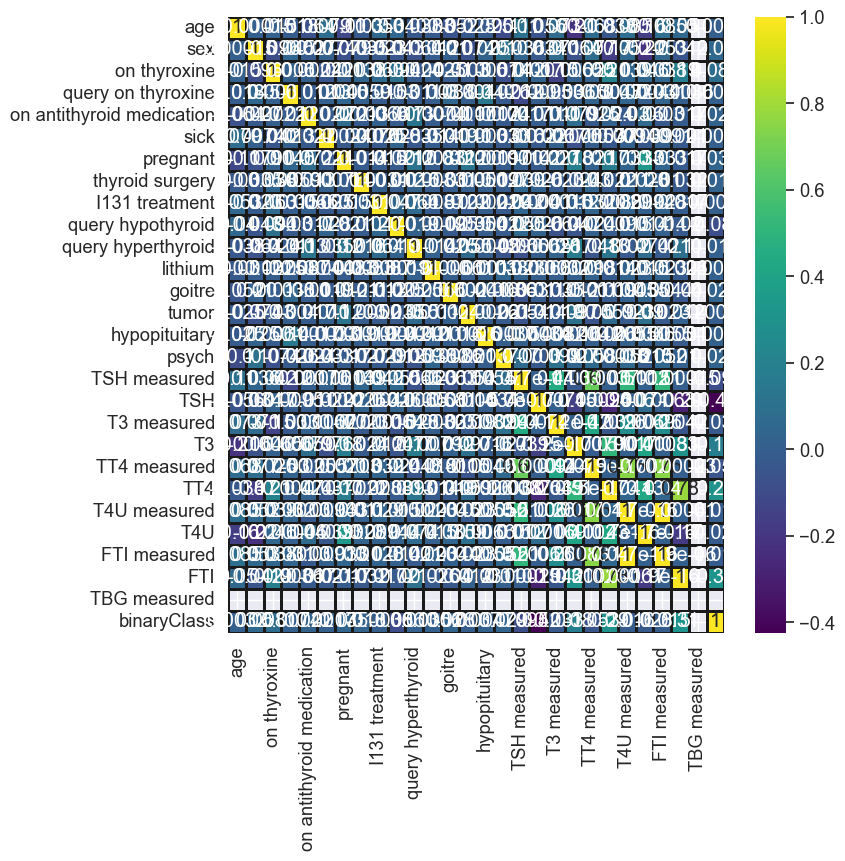

In [60]:
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True)

In [61]:
#df.dropna(axis = 0, inplace=True)

In [62]:
# df.to_csv('thyroid_clean.csv',index =False)

In [63]:
x = df.drop('binaryClass', axis=1)
y = df['binaryClass']

In [64]:
x

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,41.0,0.0,0,0,0,0,0,0,0,0,...,1.300000,1,2.5000,1,125.000000,1,1.140,1,109.000000,0
1,23.0,0.0,0,0,0,0,0,0,0,0,...,4.100000,1,2.0000,1,102.000000,0,0.995,0,110.469649,0
2,46.0,1.0,0,0,0,0,0,0,0,0,...,0.980000,0,2.0135,1,109.000000,1,0.910,1,120.000000,0
3,70.0,0.0,1,0,0,0,0,0,0,0,...,0.160000,1,1.9000,1,175.000000,0,0.995,0,110.469649,0
4,70.0,0.0,0,0,0,0,0,0,0,0,...,0.720000,1,1.2000,1,61.000000,1,0.870,1,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0,0,0,0,0,0,0,0,...,5.086766,0,2.0135,0,108.319345,0,0.995,0,110.469649,0
3768,68.0,0.0,0,0,0,0,0,0,0,0,...,1.000000,1,2.1000,1,124.000000,1,1.080,1,114.000000,0
3769,74.0,0.0,0,0,0,0,0,0,0,0,...,5.100000,1,1.8000,1,112.000000,1,1.070,1,105.000000,0
3770,72.0,1.0,0,0,0,0,0,0,0,0,...,0.700000,1,2.0000,1,82.000000,1,0.940,1,87.000000,0


In [65]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3767    1
3768    1
3769    1
3770    1
3771    1
Name: binaryClass, Length: 3772, dtype: int64

In [66]:
import imblearn
from imblearn.over_sampling import SMOTE

ros = SMOTE()  # You need to add parentheses to create an instance
X_oversample, y_oversample = ros.fit_resample(x, y)

print(X_oversample.shape)
print(y_oversample.shape)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_oversample,y_oversample,random_state=1,test_size=0.2)

(6962, 27)
(6962,)


In [67]:
y_train.value_counts()

binaryClass
1    2807
0    2762
Name: count, dtype: int64

In [68]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train)
# x_train = sc.transform(X_train)
# x_test = sc.transform(X_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,classification_report

In [70]:
# decision Tree

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
 # cross validation   
score= cross_val_score(DT,x,y,cv=5)
print(score)
print(score.mean())

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)



********************
********************
Train accuracy: 1.0
Test accuracy: 0.9956927494615937
********************
[0.99602649 0.99735099 0.99734748 0.99602122 0.99602122]
0.9965534807736223
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       674

    accuracy                           1.00      1393
   macro avg       1.00      1.00      1.00      1393
weighted avg       1.00      1.00      1.00      1393

********************
99.57% Accurate
********************


In [71]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,x,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9985642498205313
train accuracy: 1.0
********************
0.9954938781246158
********************
********************
99.86% Accurate


In [72]:
# logistic regression

LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,x,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
test accuracy: 0.9806173725771715
train accuracy: 0.9865325911294667
********************


d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

0.9620903964726756
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       674

    accuracy                           1.00      1393
   macro avg       1.00      1.00      1.00      1393
weighted avg       1.00      1.00      1.00      1393

********************
98.06% Accurate


d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [73]:
#  XGBoost

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

# prediction
train_prediction= XGB.predict(X_train)
test_prediction= XGB.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(XGB,x,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_prediction))

print('*'*20)


XGB_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(XGB_HSC*100,2)}% Accurate")

********************
test accuracy: 0.9971284996410624
train accuracy: 1.0
********************
0.9960229767948426
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       674

    accuracy                           1.00      1393
   macro avg       1.00      1.00      1.00      1393
weighted avg       1.00      1.00      1.00      1393

********************
99.71% Accurate


In [74]:
#  AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

# prediction
train_prediction= ada.predict(X_train)
test_prediction= ada.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(ada,x,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_prediction))

print('*'*20)


ada_hsc = accuracy_score(y_test,test_prediction)
print(f"{round(ada_hsc*100,2)}% Accurate")

********************
test accuracy: 0.9964106245513281
train accuracy: 0.9996408690967857
********************
0.9949626714915596
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       674

    accuracy                           1.00      1393
   macro avg       1.00      1.00      1.00      1393
weighted avg       1.00      1.00      1.00      1393

********************
99.64% Accurate


In [75]:
# support vector 

svc=SVC()
svc = AdaBoostClassifier()
svc.fit(X_train, y_train)

# prediction
train_prediction= svc.predict(X_train)
test_prediction= svc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_prediction))

print('*'*20)


svc_hsc = accuracy_score(y_test,test_prediction)
print(f"{round(svc_hsc*100,2)}% Accurate")

********************
test accuracy: 0.9964106245513281
train accuracy: 0.9996408690967857
********************
0.9949626714915596
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       674

    accuracy                           1.00      1393
   macro avg       1.00      1.00      1.00      1393
weighted avg       1.00      1.00      1.00      1393

********************
99.64% Accurate


In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import imblearn
from imblearn.over_sampling import SMOTE

ros = SMOTE()  # You need to add parentheses to create an instance
X_oversample, y_oversample = ros.fit_resample(x, y)

# print(X_oversample.shape)
# print(y_oversample.shape)

from sklearn.model_selection import train_test_split

Xx_train,Xx_test,yy_train,yy_test = train_test_split(X_oversample,y_oversample,random_state=1,test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xx_train=scaler.fit_transform(Xx_train)
Xx_test= scaler.transform(Xx_test)

# model
knn_model=KNeighborsClassifier()
knn_model.fit(Xx_train,yy_train)

# prediction

test_prediction= knn_model.predict(Xx_test)

# evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print('Test accuracy:',accuracy_score(yy_test,test_prediction))
print('Train accuracy:',accuracy_score(yy_train,train_prediction))

print('*'*20)
result = confusion_matrix(yy_test, test_prediction)
print("Confusion Matrix:")
print(result)


print('*'*20)
#  prediction Summary by species
print(classification_report(yy_test, test_prediction))


print('*'*20)
# Accuracy score
Knn_SC = accuracy_score(test_prediction,yy_test)
print(f"{round(Knn_SC*100,2)}% Accurate")


********************
Test accuracy: 0.9167264895908112
Train accuracy: 0.9996408690967857
********************
Confusion Matrix:
[[686  33]
 [ 83 591]]
********************
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       719
           1       0.95      0.88      0.91       674

    accuracy                           0.92      1393
   macro avg       0.92      0.92      0.92      1393
weighted avg       0.92      0.92      0.92      1393

********************
91.67% Accurate


In [77]:
score = [DT_SC,RF_SC,lr_HSC,XGB_HSC,ada_hsc,svc_hsc,Knn_SC]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "Linear Regression",'XGBoost',"AdaBoostclassifier","SVC","KNeighborsClassifier"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.998564
3,XGBoost,0.997128
4,AdaBoostclassifier,0.996411
5,SVC,0.996411
0,Decision Tree,0.995693
2,Linear Regression,0.980617
6,KNeighborsClassifier,0.916726


In [84]:
# XGB=XGBClassifier(random_state=42)
# XGB.fit(X_train,y_train)

# # Get feature importance scores
# feature_importances = XGB.feature_importances_

# # Get the names of the features from your dataset
# imp_feature=pd.DataFrame(index=x.columns,data=feature_importances,columns=['feature importance'])
# imp_feature
# # Create a Dat

,feature importance
age,0.003773
sex,0.000686
on thyroxine,0.098550
query on thyroxine,0.000000
on antithyroid medication,0.000000
sick,0.000000
pregnant,0.000000
thyroid surgery,0.029774
I131 treatment,0.000000
query hypothyroid,0.013952


In [78]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

# Get feature importance scores
feature_importances = rfc.feature_importances_

# Get the names of the features from your dataset
imp_feature=pd.DataFrame(index=x.columns,data=feature_importances,columns=['feature importance'])
imp_feature

,feature importance
age,0.011276
sex,0.043083
on thyroxine,0.024638
query on thyroxine,0.000153
on antithyroid medication,0.000383
sick,0.001644
pregnant,0.000881
thyroid surgery,0.003638
I131 treatment,0.000239
query hypothyroid,0.001209


In [79]:
imp_feature=imp_feature[imp_feature['feature importance']>0.01]
b=imp_feature.sort_values('feature importance')
b.index

Index(['age', 'T4U', 'on thyroxine', 'T3', 'sex', 'FTI', 'TT4', 'TSH'], dtype='object')

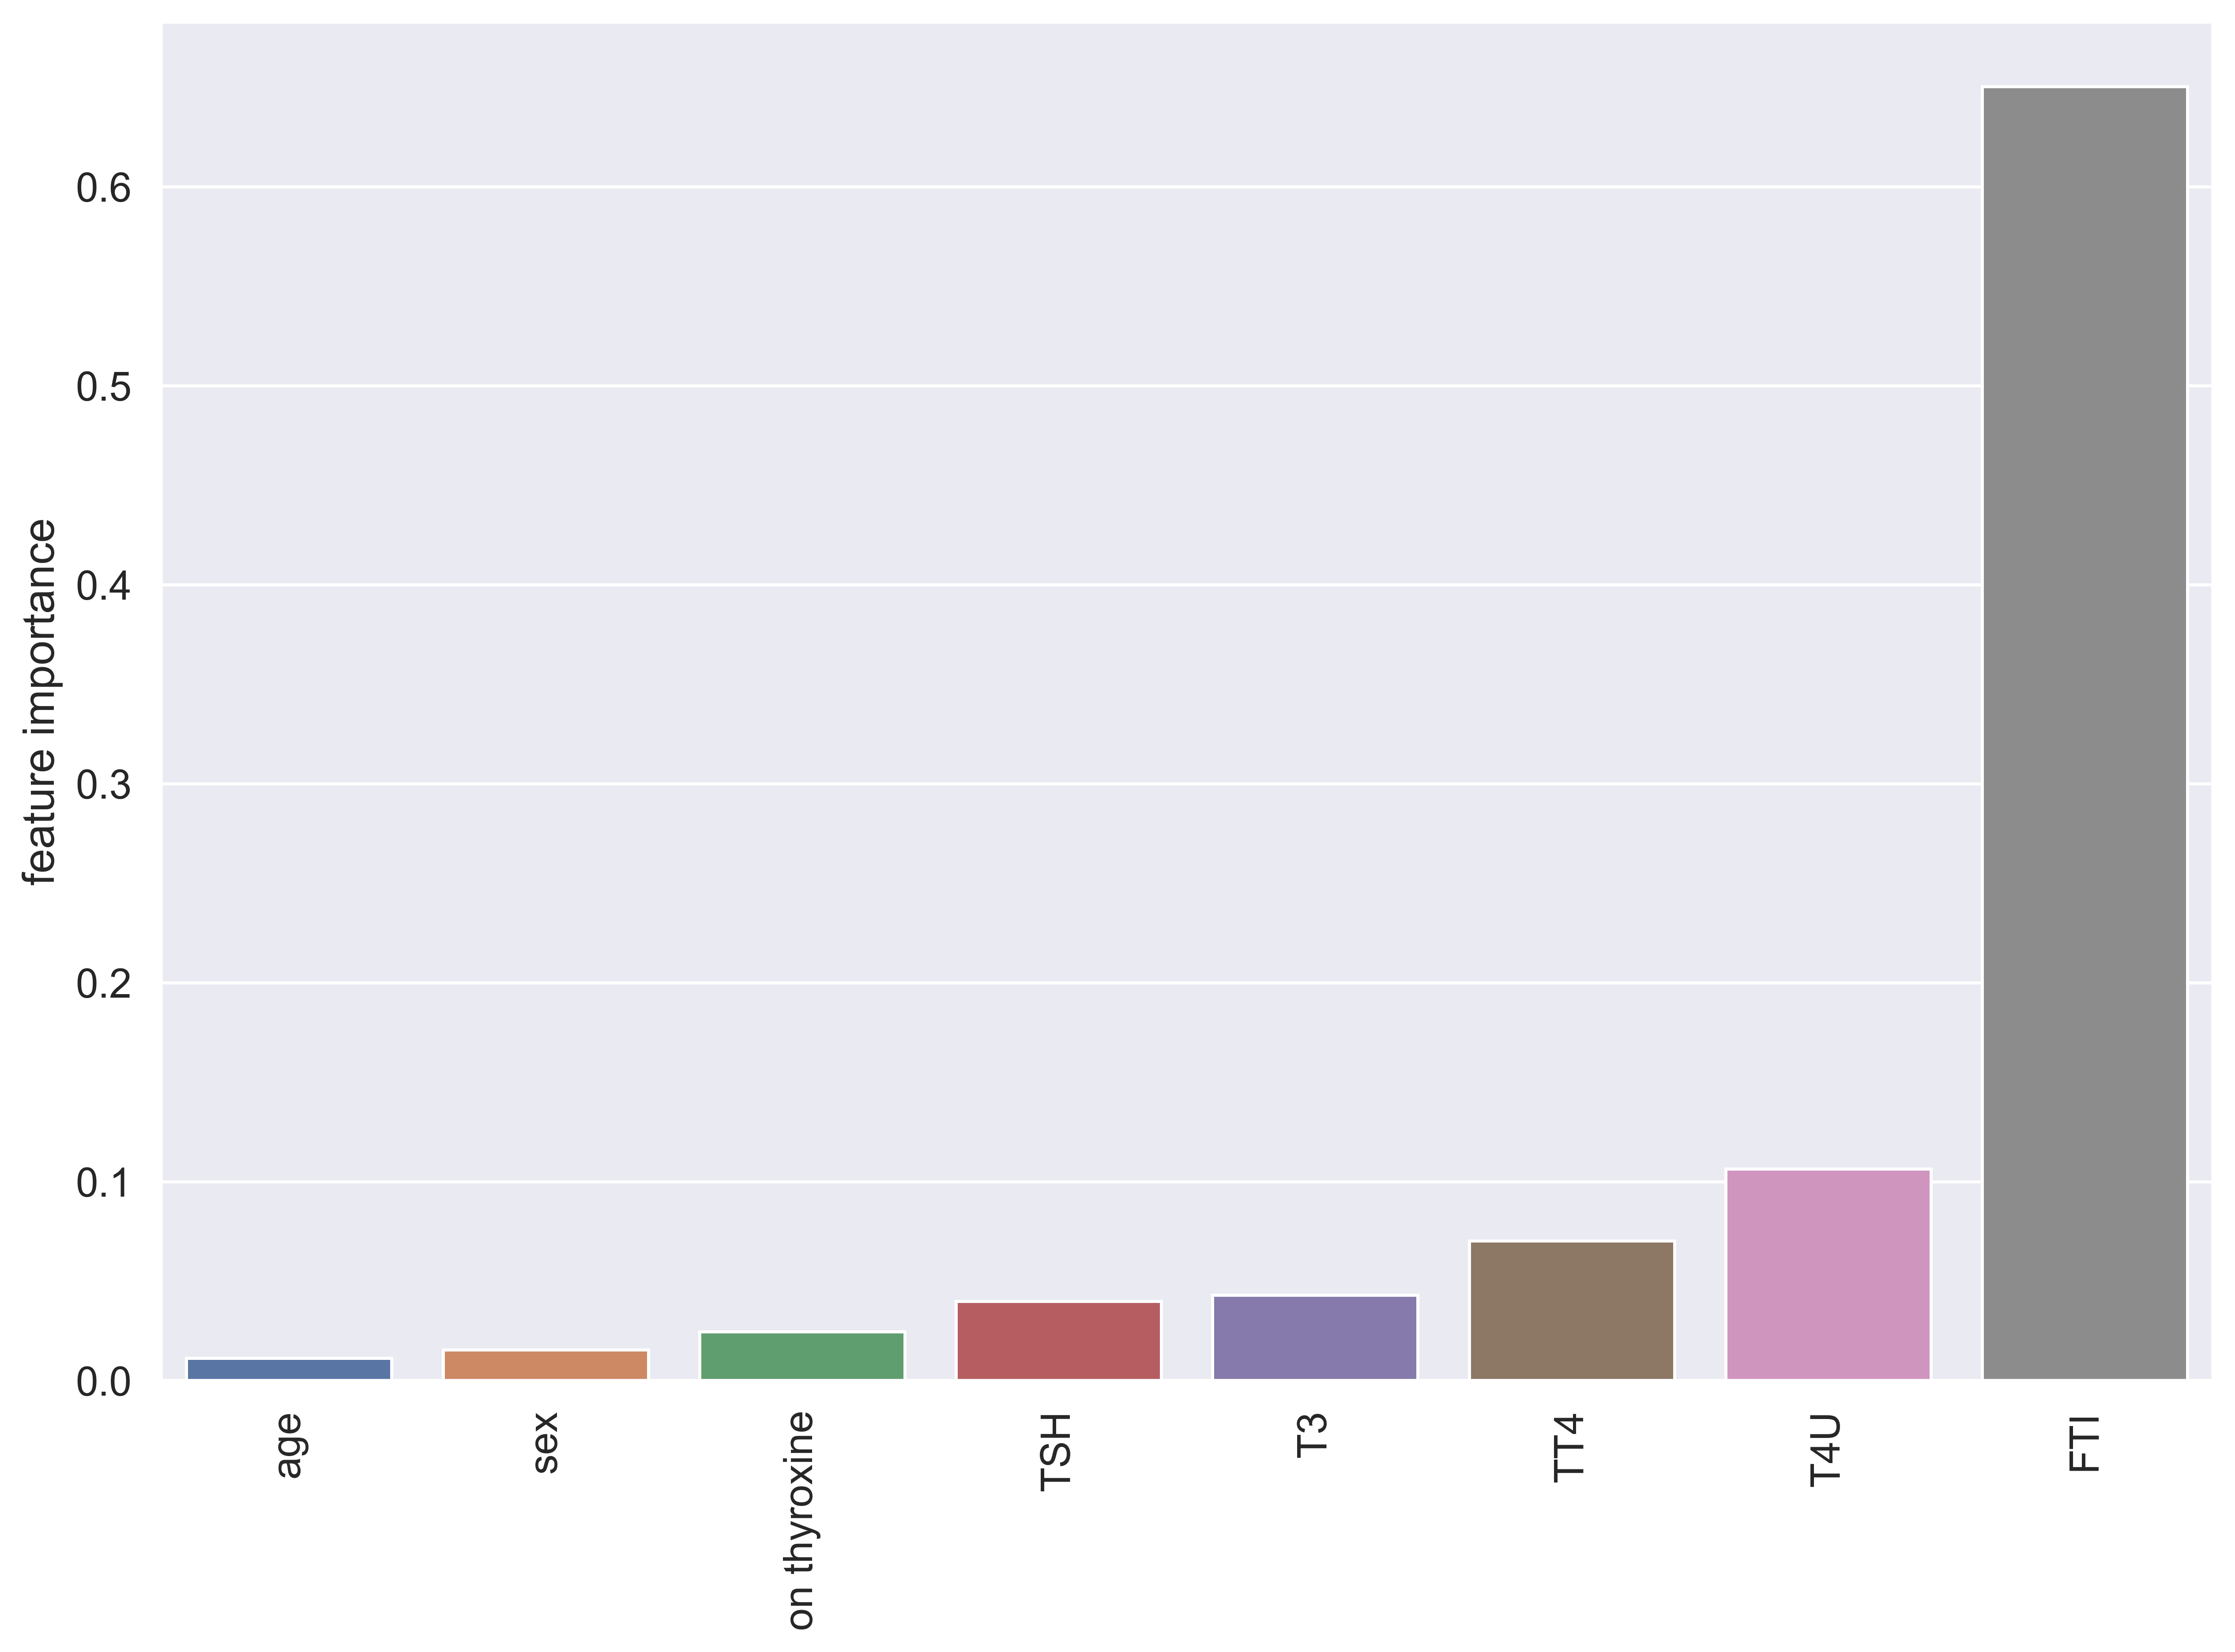

In [80]:
plt.figure(figsize=(12,8),dpi=(500))
sns.barplot(data=b,x=imp_feature.index,y='feature importance')
plt.xticks(rotation=90)
plt.show()

In [81]:
# X=x[['FTI', 'TT4', 'query hypothyroid', 'thyroid surgery', 'on thyroxine',
#        'TSH']] #xgboost

In [82]:
X=x[['age', 'T4U', 'on thyroxine', 'T3', 'sex', 'FTI', 'TT4', 'TSH']]

In [92]:
import imblearn
from imblearn.over_sampling import SMOTE

ros = SMOTE()  # You need to add parentheses to create an instance
X_oversample, y_oversample = ros.fit_resample(X, y)

print(X_oversample.shape)
print(y_oversample.shape)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_oversample,y_oversample,random_state=1,test_size=0.2)

(6962, 8)
(6962,)


In [83]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [93]:
X_train.describe()

,age,T4U,on thyroxine,T3,sex,FTI,TT4,TSH
count,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000,5569.000000
mean,51.938882,1.001792,0.067696,1.807338,0.271973,94.733914,92.552423,19.325425
std,19.312600,0.170096,0.251246,0.746705,0.417184,36.825769,38.747435,51.384488
min,1.000000,0.250000,0.000000,0.050000,0.000000,2.000000,2.000000,0.005000
25%,37.000000,0.900000,0.000000,1.400000,0.000000,77.301520,72.164884,1.400000
50%,55.000000,0.995000,0.000000,1.912209,0.000000,99.000000,94.000000,6.205736
75%,66.135879,1.087605,0.000000,2.100000,0.681114,111.857753,112.000000,12.034180
max,455.000000,2.320000,1.000000,10.600000,1.000000,395.000000,430.000000,530.000000


In [125]:
# X_train.to_csv('X_train.csv', index=False)

In [95]:
y_test.value_counts()

binaryClass
0    719
1    674
Name: count, dtype: int64

In [128]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9956927494615937
train accuracy: 1.0
********************
0.994963374145836
********************
********************
99.57% Accurate


In [129]:
df1 = pd.DataFrame({'y_actual': y_test, 'y_pred': test_prediction})
df1.head(20)

,y_actual,y_pred
1873,1,1
6497,0,0
4482,0,0
2215,0,0
1287,1,1
3887,0,0
3183,1,1
3851,0,0
3186,1,1
3091,1,1


In [122]:
X_train.iloc[2]

age              37.00
T4U               1.19
on thyroxine      0.00
T3                2.10
sex               1.00
FTI             124.00
TT4             148.00
TSH               0.60
Name: 3285, dtype: float64

In [115]:
loaded_model.predict([[77.0,1.0200,0.00,2.01,0,81.0,82,36]])

d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [97]:
import pickle
#save the model
model = rfc  # Your machine learning model object
file_path = 'rfc_thyroid.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [98]:
# load the model
import pickle

file_path = 'rfc_thyroid.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [127]:
X_test

,age,T4U,on thyroxine,T3,sex,FTI,TT4,TSH
1873,40.000000,1.020000,0,2.000000,0.000000,118.000000,121.000000,0.730000
6497,64.114339,0.912233,0,0.874542,0.732470,30.394820,27.535060,89.210361
4482,65.544814,0.869132,0,1.657042,0.493598,112.212223,80.455186,7.688476
2215,48.000000,1.080000,1,1.000000,0.000000,59.000000,63.000000,178.000000
1287,52.000000,1.110000,0,2.300000,1.000000,105.000000,117.000000,1.500000
...,...,...,...,...,...,...,...,...
492,33.000000,1.010000,0,2.100000,0.000000,157.000000,159.000000,0.045000
3053,78.000000,0.880000,0,1.900000,0.000000,102.000000,90.000000,0.570000
3511,83.000000,0.760000,0,0.700000,0.000000,93.000000,71.000000,2.200000
1114,69.000000,1.500000,0,2.000000,0.000000,59.000000,89.000000,26.000000


In [113]:
loaded_model.predict([[40.000000,	1.020000,	0,	2.000000,	0.000000,	118.000000,	121.000000,	0.730000]])


d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [105]:
loaded_model.predict([[45.0,0.85,0,0.7,1.0,63.0,54.0,5.0]])


d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [116]:
loaded_model.predict([[77.0,1.0200,0.00,2.01,0,81.0,82,36]])

d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [131]:
loaded_model.predict([[44,39,0,1.4,0,33,39,45]])

# age	T4U	on thyroxine	T3	sex	FTI	TT4	TSH

d:\Codebook\Machine_Learning\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

<img src="https://lh3.googleusercontent.com/proxy/dmZ-7K8n0tfjlAlmjL316IQymLkEUejTyRJe_PvnpoIvDzoDixx_4L1JmNBYg0xhdyywrCkkjD9F5Snp7PJU8N6RFZ0ke4IO9wMe5c2xbJvC" width="800px">

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [ ]:
x.shape

In [ ]:
x.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(63, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [ ]:
%%time
history = model.fit(x=x_train, y=y_train, epochs=100, callbacks=[lrd, mcp, es], batch_size=64, validation_split=0.1)


In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
y_pred = model.predict(x_test)
y_pred

In [ ]:
y_pred[1]

In [ ]:
y_test

In [ ]:
%%time
model.evaluate(x_test, y_test)

In [ ]:
model.predict(x_test)[50]

In [ ]:
model.predict_classes(x_test)[50]

In [ ]:
y_test.iloc[50]

In [ ]:
model.predict(x_test)[70]

In [ ]:
model.predict_classes(x_test)[70]

In [ ]:
y_test.iloc[70]

In [ ]:
model.predict(sc.transform([[42.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,132,1.00,1.00,109.0,1.0,0.88,.100,110.00,0.00,0,1]]))

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
import joblib

In [ ]:
joblib.dump(sc, 'scaler.pkl')

In [ ]:
sc = joblib.load('scaler.pkl')

In [ ]:
%%time
from tensorflow.keras.models import load_model
model = load_model('model.h5')
model.predict(sc.transform([[42.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,132,1.00,1.00,109.0,1.0,0.88,.100,110.00,0.00,0,1]]))